In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력 창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과데이터의 종류 수 만큼 결과데이터의 컬럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 더이상 성능 향상이 이루어지지 않는다면 조기 중단 시킬 수 있다.
from tensorflow.keras.callbacks import EarlyStopping

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# seed 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터를 읽어온다.
df1 = pd.read_csv('data/breast_cancer.csv')
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [5]:
# 인코딩
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [6]:
# 모델 설정
model = Sequential()

model.add(Dense(60, input_dim=30))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [8]:
# 모델들이 저장될 위치
# epoch : 학습 횟수
# val_loss : 검증 데이터의 손실률
path1 = 'models/21_분류 실습 예제/{epoch}-{val_loss}.hdf5'
path2 = 'models/21_분류 실습 예제/최종.hdf5'

# 저장 콜백 설정
# save_best_only : True를 넣어주면 모니터링하는 값이 개선 되었을 경우에만
# 저장을 한다. 기본은 False 이며 False시 매번 저장을 한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                       save_best_only=True)

call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', 
                       save_best_only=True)

In [9]:
# 조기 중단
# patience : 현재 평가 값이 이전 평가 값 보다 좋다고 판단될 경우 앞으로
# 몇번을 더 볼 것인가를 설정하는 부분
call3 = EarlyStopping(monitor='val_loss', patience=50)

In [10]:
# 테스트를 위해 학습과 검증으로 나눠서 한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=2000, batch_size=500, 
                    callbacks=[call1, call2, call3])

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 54.6803 - accuracy: 0.5804 - val_loss: 40.8845 - val_accuracy: 0.6131
Epoch 2/2000
1/1 [==============================] - 0s 23ms/step - loss: 44.3653 - accuracy: 0.5804 - val_loss: 34.7075 - val_accuracy: 0.6131
Epoch 3/2000
1/1 [==============================] - 0s 19ms/step - loss: 37.6340 - accuracy: 0.5804 - val_loss: 28.9450 - val_accuracy: 0.6131
Epoch 4/2000
1/1 [==============================] - 0s 19ms/step - loss: 31.3425 - accuracy: 0.5804 - val_loss: 22.8759 - val_accuracy: 0.6131
Epoch 5/2000
1/1 [==============================] - 0s 23ms/step - loss: 24.7415 - accuracy: 0.5804 - val_loss: 16.6782 - val_accuracy: 0.6131
Epoch 6/2000
1/1 [==============================] - 0s 24ms/step - loss: 17.9948 - accuracy: 0.5804 - val_loss: 10.4249 - val_accuracy: 0.6131
Epoch 7/2000
1/1 [==============================] - 0s 21ms/step - loss: 11.2180 - accuracy: 0.5804 - val_loss: 4.1716 - val_accuracy: 0.6131
Ep

Epoch 59/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.2505 - accuracy: 0.9054 - val_loss: 0.2387 - val_accuracy: 0.9197
Epoch 60/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2494 - accuracy: 0.9022 - val_loss: 0.2308 - val_accuracy: 0.9197
Epoch 61/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2440 - accuracy: 0.9117 - val_loss: 0.2214 - val_accuracy: 0.9270
Epoch 62/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.2410 - accuracy: 0.9117 - val_loss: 0.2165 - val_accuracy: 0.9197
Epoch 63/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2404 - accuracy: 0.9117 - val_loss: 0.2165 - val_accuracy: 0.9197
Epoch 64/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.2374 - accuracy: 0.9148 - val_loss: 0.2162 - val_accuracy: 0.9197
Epoch 65/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.2347 - accuracy: 0.9148 - val_loss: 0.2194 - val_accuracy: 0.9197
Epoch 

1/1 [==============================] - 0s 20ms/step - loss: 0.2012 - accuracy: 0.9274 - val_loss: 0.2161 - val_accuracy: 0.9124
Epoch 117/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2008 - accuracy: 0.9243 - val_loss: 0.2158 - val_accuracy: 0.9124
Epoch 118/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2007 - accuracy: 0.9243 - val_loss: 0.2169 - val_accuracy: 0.9124
Epoch 119/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2000 - accuracy: 0.9306 - val_loss: 0.2175 - val_accuracy: 0.9124
Epoch 120/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1997 - accuracy: 0.9306 - val_loss: 0.2187 - val_accuracy: 0.9124
Epoch 121/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1992 - accuracy: 0.9306 - val_loss: 0.2175 - val_accuracy: 0.9124


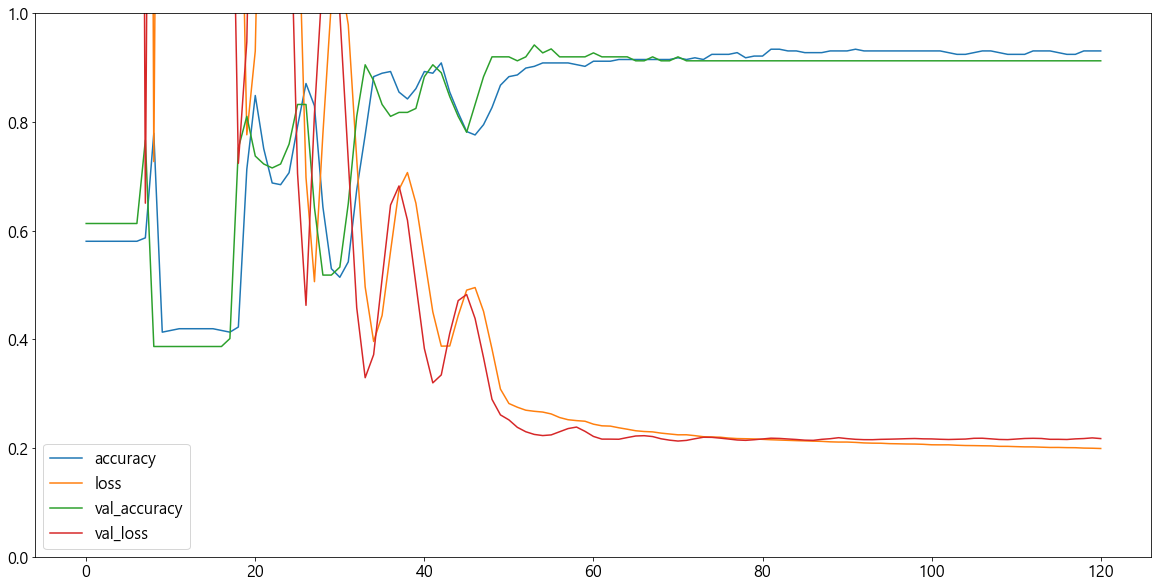

In [11]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [13]:
# 저장한 모델을 복원한다.
best_model = load_model('models/21_분류 실습 예제/최종.hdf5')
best_model

In [14]:
# 성능평가
a1 = best_model.evaluate(X_test, y_test)
print(f'손실율 : {a1[0]}')
print(f'정확도 : {a1[1]}')

5/5 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9197
손실율 : 0.2129383683204651
정확도 : 0.9197080135345459


In [15]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [16]:
# 예측 결과를 추출한다.
a1 = best_model.predict(df2)
a1

array([[0.32207394],
       [0.29640093],
       [0.08443559],
       [0.07841029],
       [0.11098747],
       [0.0411174 ],
       [0.9999995 ],
       [1.        ],
       [0.08704656],
       [0.05250024],
       [0.40485248],
       [0.16685101],
       [0.23598197],
       [0.07438356],
       [0.9997062 ],
       [0.08895205],
       [0.08302286],
       [0.11449536],
       [0.83774793],
       [0.07222343],
       [0.03361632],
       [0.06422539],
       [0.6251834 ],
       [0.11448769],
       [0.03414109],
       [0.10032275],
       [0.04978126],
       [0.8698462 ],
       [0.14623046],
       [0.15075772],
       [0.13870612],
       [0.03181888],
       [0.46600404],
       [0.9999981 ],
       [0.18615763],
       [0.7584484 ],
       [0.33554062],
       [0.86137897],
       [0.999388  ],
       [0.06358947],
       [0.08144052],
       [0.11453743],
       [0.28249472],
       [0.16653079],
       [0.9999877 ],
       [0.99985874],
       [0.45461172],
       [0.571

In [17]:
y_pred = (a1 > 0.5).astype('int32')
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [19]:
# 복원
pred2 = encoder1.inverse_transform(y_pred)
pred2

array(['benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benig

In [20]:
# 결과를 붙혀준다.
df2['target'] = pred2
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330,benign
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,benign
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,benign
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,benign
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,malignant
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,malignant
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,malignant
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,malignant


In [21]:
# 결과를 저장한다.
df2.to_csv('data/breast_cancer_result.csv')